*As of Project PyTHAGORA Alpha Release 7/24/2024, this project/lesson is known to be incomplete, early updates should include the creation and testing of this lesson.*

# Sympy

Sympy is a module that can be used to do symbolic math such as solving systems of equations with multiple unknowns, finding derivatives and integrals of functions, and matrix methods. Performing symbolic calculations can be incredibly useful if you need to solve complex equations but do not have all of the needed information.

In this lesson I will show you a few real world examples where using Sympy to solve an equation is helpful.

## Basics

To start, you will need to `import sympy` in order to use its functionality. We will also `import math` to use some of the math functions.

In [2]:
from sympy import *
import math

To create an equation you first need to create some `sympy.symbols` to represent the values in the equation. To create one you type the desired object name equal to `sympy.symbols('value')` where the value in the quotes is the variable that you want to appear in the equation. This accepts all letters of the english alphabet as well as the greek alphabet.

In [3]:
#create two variables, pi and r
pi, r = symbols('pi r')


Before you print anything you should first call `init_printing()` to set up printing. Alternatively, you can call `init_session()` which will initialize a few common symbols and call 'init_printing()' for you.

In [4]:
init_session()

IPython console for SymPy 1.13.2 (Python 3.12.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



When printing with sympy there are a lot of options you will need to consider:

If you are using your terminal, you must have LaTeX installed on your computer for it to render using Tex, otherwise it will render using unicode or ASCII. 

When you use the `print()` function, it will print the string form of any expression passed into it. This can also be acheived with `str()`.

To avoid this in the IPython Notebooks (any jupyter notebooks) simply do not use a print function at all, the variables and expressions will be displayed automatically in LaTeX. Alternatively, you can use pprint which will display expressions using unicode.

In [5]:
#Pretty Printing Unicode
pprint(pi*r**2)
#String Printing
print(pi*r**2)
#LaTeX Printing
pi*r**2

   2
π⋅r 
pi*r**2


If you would like to copy your output to a document and it supports LaTeX, you can use the `Latex()` function to output the latex form of your expression:

In [6]:
latex(pi*r**2)

'\\pi r^{2}'

In addition to symbols, you can also create expressions.

In [7]:
expr = pi*r**2
expr

## Operations

#### **math.sqrt vs sympy.sqrt**

Sympy exists to provide you with the ability to symbolically solve expressions without needing numbers, this allows for a different approach to certain mathmatical operations. The `sqrt()` function is a perfect example. 

With the `math` package, `sqrt` will output as precise of an answer as can be contained in a floating point object. This is useful if you are looking for a numerical answer, but sympy provides an alternative: instead of the closest approximation of an exact answer, it will provide you with a more symbolically exact answer. For example, here is the square root of 8 as given by `math.sqrt()` and `sympy.sqrt`

In [8]:
import math

print(math.sqrt(8)) #math module, floating point decimal 
sqrt(8)             #sympy module, 'exact' solution

2.8284271247461903


Additionally, if you try to take the square root of a negative number with `math` you will get a domain error. Alternatively, using `sympy` we get *i*.

In [27]:
math.sqrt(-1)

ValueError: math domain error

In [28]:
sqrt(-1)

This makes solving systems with non-real solutions easier.

#### **Simple Expression Operations**

Say you have some expression:

$x^2 + 4x$

And another expression:

$y^2 - 4x$

If you were to add the two expressions together, you would get:

$x^2 + y^2$

Well, using sympy, you can do exactly that.

In [9]:
exp1 = x**2 + 4*x
exp2 = y**2 - 4*x
exp1+exp2

You can also multiply entire expressions:

In [10]:
exp1*exp2

But wait, this is not the most useful form. Luckily sympy has a factor and expand method to fix that.

In [11]:
exp3 = expand(exp1*exp2)
exp3

In [12]:
factor(exp3)

#### **Advanced Symbolic Mathmatics**

In addition to basic mathmatical methods, we can also use more complex operations such as integrals and derivatives.

In [13]:
diff(exp1)

If the expression contains only one variable, the `diff()` function will automatically take the derivative with respect to the variable contained within the expression. If you would like to integrate with respect to a different variable, that can be passed as an additional argument:

In [14]:
diff(exp1, y)

If the expression contains two different variables, you will need to pass the second argument to specify the variable you are differentiating with respect to. Otherwise you will get a `ValueError`.

In [15]:
diff(exp2, y), diff(exp2, x)

Integrals work in a similar way:

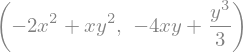

In [16]:
integrate(exp2, x), integrate(exp2, y)

You can also add limits to an integral by passing a tuple as the second argument like this: (var of integration, lower limit, upper limit).

In [17]:
integrate(exp2, (x, 0, 10))

You can even use infinity as a limit with '-oo' or 'oo' (two letter "o"s):

In [18]:
integrate(sin(x), (x, -oo, oo))

The list goes on: solving differential equations, finding limits, solving systems of equations, finding eigenvalues, cross products, and dot products are all additional options. I am going to work through some real world equations to demonstrate the power of symbolic computing in Python and demonstrate each of these functions in more depth.

## Position, Velocity, and Acceleration

Consider an object in motion who's acceleration is given by $a(t) = a$

In [19]:
a, v0, x0, v, a = symbols('a, v0, x0, v, a')
a_t = a
a_t

The acceleration of an object is the change in the objects velocity over time:

$a = \frac{\Delta v}{\Delta t}$

If you consider an infinitely small change in velocity over some infinitely small change in time instead of the finite change represented by $\Delta$, we can use the small change $\delta$.

$a = \frac{\delta v}{\delta t}$

In other words, acceleration is the time derivative of velocity. Knowing this, we can get an expression for velocity by integrating acceleration with respect to time.

In [20]:
v_t = integrate(a_t, t)
v_t

Unfortunately, Sympy does not include the constant of integration. If you need that you can get it by structuring your equation as a differential equation, which I will do later. Alternatively, you can manually add the constant, C, or in this case v0.

In [24]:
v_t = v_t + v0
v_t

Similarly, we know that velocity is the time derivative of position and as such we can get a 

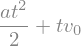

In [25]:
#Testing

x_t = integrate(v_t, t)
x_t

Again, adding the constant of integration, or x0.

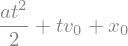

In [26]:
x_t = x_t + x0
x_t

This equation is consistant with what we know to be the position of an object with respect to time, velocity, and acceleration.

## Solving Equations

Let's break down an how an equation works in sympy. You can create an equation using the `Eq(left, right)` function where each parameter is either side of the equals sign. 

In [31]:
x, t, v, gg, tp, xp = symbols("x, t, v, gamma, t', x'")

Eq(x, gg*(xp + v*tp))

Alternatively, we know that y-x = 0 only when x = y, so we can intuitively know that y-x must be the same as y=x if we set it equal to zero. Sympy allows this as well.

In [34]:
Eq(x-gg*(xp+v*tp),0)

We can solve these equations using the `solveset()` function and specifying the independent variable. For a better example:

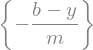

In [36]:
x, y, m, b = symbols('x,y,m,b')

solveset(Eq(y,m*x+b), x)

We can also solve systems of equations. Recall the question in [1a-2 Project 0](../Module1_BaseTrack/1a-2%20Project%200-1%20First%20Project.ipynb) where I asked you to find the intersection of two lines. You arrived at your answer by solving the system of equations. This can be done more simply using sympy. If the system is linear then you use `linesolve()`. Or in the case of the example in the above project you will use `nonlinsolve()`.

In [42]:
x, y = symbols('x, y')

#Using nonlinesolve
eq1 = Eq(x- sqrt(y), 0)
eq2 = Eq(y- 7*x, 0)

print(nonlinsolve([eq1, eq2], (x,y)))

eq1 = Eq(y, 4*x +8)
eq2 = Eq(y, -0.7*x -13)

print(linsolve([eq1, eq2,], (x,y)))


{(0, 0), (7, 49)}
{(-4.46808510638298, -9.87234042553191)}


## Ordinary Differential Equations

Finally, we can solve differential equations using the `dsolve()` function. This function needs function objects. We can create those the same way we create symbols:

In [43]:
f, g = symbols('f, g', cls=Function)

This creates f and g as undefined functions. We can provide it a variable by calling:

In [44]:
f(x)

now we have an unknown equation of x. If we take the derivative of it, it will not be evaulated.

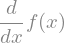

In [45]:
f(x).diff(x)

we can continue to take the derivative by adding parameters to the `diff()` method.

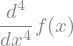

In [46]:
f(x).diff(x,x,x,x) # fourth derivative

If we make an equation with multiple different variables we can do partial derivatives as well.

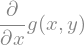

In [48]:
g(x,y).diff(x)

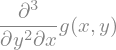

In [49]:
g(x,y).diff(x,y,y) 

We can create a differential equation using the `Eq()` function and multiple of these differentials. 

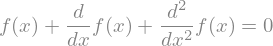

In [51]:
diffeq = Eq(f(x).diff(x,x) + f(x).diff(x) + f(x), 0)
diffeq

We can solve this using `dsolve()` and we will get a function return:

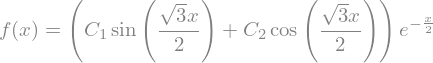

In [52]:
dsolve(diffeq, f(x))

## Matrices

In this lesson, the final thing I will discuss is matrices. You have already worked with them in depth numerically with Numpy, this is generally a better way to approach matrix operations; however, sympy can provide a different approach that some may find more intuitive. You can create a matrix with the `Matrix()` constructor and passing in row vectors (lists).

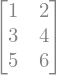

In [53]:
Matrix([[1,2], [3,4], [5,6]])

Just a single list is considered to be a column.

In [54]:
Matrix([1,2,3])

You can get the shape of a matrix using the `.shape()` method on a matrix object.

In [58]:
M = Matrix([[1,2,3], [1,2,3]])
M.shape

We can also create matrices of ones or zeros using the `ones()` and `zeros()` function similar to Numpy. Or the identity matrix using `eye()`

In [59]:
zeros(1,3)

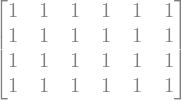

In [60]:
ones(4,6)

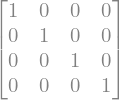

In [93]:
eye(4)

Similar to the matrices of numpy, these matrix objects are mutable. Unfortunately, this means they cannot be used in dictionaries, other sympy expressions, or other places that require elements to be immutable. This can be avoided by using the ImmutableMatrix which does not have the following methods.

**Mutable Fucntions**

You can delete a row or column using `.col_del` and `.row_del`

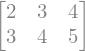

In [90]:
M = Matrix([[2,3,4],[3,4,5]])
M


In [91]:
M.col_del(0)
M.row_del(-1)
M

We can add columns and rows back using `.row_insert` and `.col_insert`

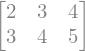

In [92]:
M = M.row_insert(0, Matrix([[2,3]]))
M = M.col_insert(2, Matrix([4,5]))
M

**Matrix Methods**

Finding the determinant, eigenvalues, the cross product, and the dot product are all possible with Sympy as well.

In [96]:
M = Matrix([[2,3,6],[6,4,3],[1,2,5]])
M.det()

In [114]:
M1 = Matrix([[1,2,2]])
M2 = Matrix([[6,5,0]])

M1.cross(M2),M1.dot(M2)

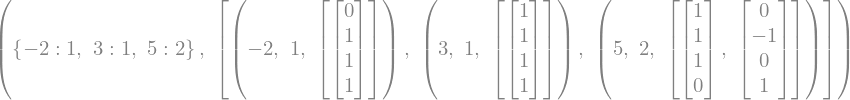

In [117]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M.eigenvals(), M.eigenvects()